<a href="https://colab.research.google.com/github/Ju-Ri-Oh/projects/blob/main/mastery_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

## Dataset

This dataset contains students from various cities and majors in India with multiple features including the target variable Depression (True/False).

The dataset can be found here: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data?select=student_depression_dataset.csv


## Features

  **id**
    A unique identifier assigned to each student record in the dataset.

  **Gender**
    The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

  **Age**
    The age of the student in years.

  **City**
    The city or region where the student resides, providing geographical context for the analysis.

  **Profession**
    The field of work or study of the student, which may offer insights into occupational or academic stress factors.

  **Academic Pressure**
    A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

  **Work Pressure**
    A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

  **CGPA**
    The cumulative grade point average of the student, reflecting overall academic performance.

  **Study Satisfaction**
    An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

  **Job Satisfaction**
    A measure of the student’s satisfaction with their job or work environment, if applicable.

  **Sleep Duration**
    The average number of hours the student sleeps per day, which is an important factor in mental health.

  **Dietary Habits**
    An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

  **Degree**
    The academic degree or program that the student is pursuing.

  **Have you ever had suicidal thoughts ?**
    A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

  **Work/Study Hours**
    The average number of hours per day the student dedicates to work or study, which can influence stress levels.

  **Financial Stress**
    A measure of the stress experienced due to financial concerns, which may affect mental health.

  **Family History of Mental Illness**
    Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

  **Depression**
    The target variable that indicates whether the student is experiencing depression (Yes/No). This is the primary focus of the analysis.


## Business Question

**Can present features be used to accurately predict Depression in students?**

This would allow the identification of high-risk students for depression and could result in future early-prevention methods deployed by higher education institutions.

## Hypotheses

Having a M.Sc. in Research Methods in Psychology, I am using domain knowledge to deploy the following hypotheses in addition to the business question:

**Hypothesis 1:**

Gender (Female) will be a significant predictor of Depression.

**Hypothesis 2:**

Having experienced suicidal thoughts in the (recent) past will be a significant predictor of Depression.

**Hypothesis 3:**

Students with a family history of mental illness will be more likely to experience Depression.

# **Optional: Corrupted Dataset**

This step is not necessary to solve the business question itself but was implemented to increase the difficulty by mimicing other datasets that have multiple tables and are located in a SQL database and come with missing and/or faulty values.

I will corrupt the data, split it, transform it to SQLite data, run SQL queries to filter the data, run EDA on the corrupted dataset, and finally clean the dataset.

Note: The cleaned corrupted dataset will be tossed at the end of this chapter and exchanged for the original dataset for further analysis, which is already clean and non-synthetic, thus more valuable for real world application.

## Corrupting the Data

Here I will corrupt the original dataset to introduce errors to be fixed later, to showcase how to handle errors in a raw, uncleaned dataset.

In [194]:
# Removing warnings for a cleaner Output - Should disable this cell when coding
import warnings
warnings.filterwarnings('ignore')

In [195]:
# Load the dataset into a dataframe
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Datasets/student_depression_dataset.csv'
df  = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
# Data Corruption
# Introduce NaN/null values randomly in 10% of the dataset
for col in df.columns:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Introduce datatype errors in CGPA and Age
df['CGPA'] = df['CGPA'].astype(str)
df['Age'] = df['Age'].astype(str)

# Introduce typos in Gender column (5%)
gender_errors = ['male', 'Femaale', 'mle', 'Fmale', 'M', 'maale', 'F', 'femal']  # Common misspellings
gender_idx = df.sample(frac=0.05, random_state=42).index # For deterministic sampling
df.loc[gender_idx, 'Gender'] = np.random.choice(gender_errors, size=len(gender_idx))

# Introduce outliers in Age (2%)
age_outliers = [0, 5, 99, 120]  # Unrealistic student ages
age_idx = df.sample(frac=0.02, random_state=43).index
df.loc[age_idx, 'Age'] = np.random.choice(age_outliers, size=len(age_idx))

# Introduce outliers in CGPA (2%)
cgpa_outliers = [-3, -2, -1, 10, 11]  # Invalid CGPA values
cgpa_idx = df.sample(frac=0.02, random_state=44).index
df.loc[cgpa_idx, 'CGPA'] = np.random.choice(cgpa_outliers, size=len(cgpa_idx))

# Duplicate 5% of the dataset
df = pd.concat([df, df.sample(frac=0.05)], ignore_index=True)

Now saving the corrupted dataframe to a CSV file.

In [197]:
df.to_csv("/content/drive/MyDrive/Datasets/corrupted_students_data.csv", index=False)

## Split one CSV into multiples

Here I am breaking down the dataset into multiple .cvs files serving as coherent tables with Primary- and Foreigns keys.

In [198]:
# Load the corrupted dataset into a dataframe
df  = pd.read_csv('/content/drive/MyDrive/Datasets/corrupted_students_data.csv')

# Creating Tables
# Students Table (Core Demographics)
students_df = df[['id', 'Age', 'Gender', 'City', 'Depression']]

# Academic_Info Table
academic_df = df[['id', 'CGPA', 'Academic Pressure', 'Study Satisfaction']]
academic_df.rename(columns={'id': 'student_id'}, inplace=True) # Changing the id for subsequent tables as the foreign key

# Lifestyle_Wellbeing Table
lifestyle_df = df[['id', 'Sleep Duration', 'Dietary Habits', 'Work Pressure',
                   'Job Satisfaction', 'Work/Study Hours']]
lifestyle_df.rename(columns={'id': 'student_id'}, inplace=True)

# Additional_Factors Table
additional_df = df[['id', 'Profession', 'Degree', 'Financial Stress',
                    'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']]
additional_df.rename(columns={'id': 'student_id'}, inplace=True)

Now I am saving the dataframes as seperate .csv files.

In [199]:
# Turn Dataframe into CSV
students_df.to_csv("students.csv", index=False) # No index required due to the 'id' keys.
academic_df.to_csv("academic_info.csv", index=False)
lifestyle_df.to_csv("lifestyle_wellbeing.csv", index=False)
additional_df.to_csv("additional_factors.csv", index=False)

import os
print(os.listdir())  # All 4 csv are now in the directory in addition to the standard google collab hidden folders.

['.config', 'additional_factors.csv', 'academic_info.csv', 'drive', 'lifestyle_wellbeing.csv', 'students.csv', 'sample_data']


## Transform CSV into SQL file

Here I will turn the CSV files into SQL files (tables) in order to run SQL queries.

In [200]:
# Installing SQLite to Google Collab
#!pip install sqlite3

Appears to be no longer required in Google collab.

In [201]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Load CSVs into Pandas
students = pd.read_csv("students.csv")
lifestyle_wellbeing = pd.read_csv("lifestyle_wellbeing.csv")
academic_info = pd.read_csv("academic_info.csv")
additional_factors = pd.read_csv("additional_factors.csv")

# Save them as SQL tables
students.to_sql("students", conn, index=False, if_exists="replace")
lifestyle_wellbeing.to_sql("lifestyle_wellbeing", conn, index=False, if_exists="replace")
academic_info.to_sql("academic_info", conn, index=False, if_exists="replace")
additional_factors.to_sql("additional_factors", conn, index=False, if_exists="replace")

print(f'There are now {len(students)} rows loaded into the SQL tables')

There are now 29296 rows loaded into the SQL tables


## SQL Queries

Showcasing SQL queries in python code that would make sense for exploring and filtering the data for other business questions.

In [202]:
# Note: columns that were created with spaces are in quotation marks

# Choosing important features and getting an overview
query = """
SELECT
    s.id,
    s.Gender,
    s.City,
    a.CGPA,
    a.`Academic Pressure`,
    l.`Sleep Duration`,
    l.`Work Pressure`,
    f.Profession,
    f.`Financial Stress`,
    f.`Have you ever had suicidal thoughts ?` AS Suicidal_Thoughts
FROM students s
JOIN academic_info a ON s.id = a.student_id
JOIN lifestyle_wellbeing l ON s.id = l.student_id
JOIN additional_factors f ON s.id = f.student_id
WHERE s.Depression = 1
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print(result)

      id  Gender           City  CGPA  Academic Pressure       Sleep Duration  Work Pressure Profession Financial Stress Suicidal_Thoughts
0    2.0    Male  Visakhapatnam  8.97                5.0                 None            0.0       None             None               Yes
1   30.0    None       Varanasi  5.59                3.0          '7-8 hours'            NaN       None              5.0               Yes
2   59.0    Male         Nagpur  9.79                3.0          '7-8 hours'            0.0       None             None               Yes
3   62.0    Male         Nashik  8.38                2.0  'Less than 5 hours'            0.0    Student              5.0               Yes
4   83.0    None         Nagpur  6.10                3.0          '5-6 hours'            0.0    Student             None               Yes
5   94.0    Male         Kalyan  7.04                5.0  'Less than 5 hours'            0.0    Student              1.0                No
6  103.0  Female           

In [203]:
# Grouping Depression by Gender as a first glance for the first Hypothesis
query = """
SELECT
    s.Gender,
    COUNT(*) AS total,
    SUM(CASE WHEN s.Depression = 1 THEN 1 ELSE 0 END) AS depressed,
    ROUND(100.0 * SUM(CASE WHEN s.Depression = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS depression_rate_percent
FROM students s
GROUP BY s.Gender;
"""
result = pd.read_sql(query, conn)
print(result)

     Gender  total  depressed  depression_rate_percent
0      None   2791       1462                    52.38
1         F    179         90                    50.28
2   Femaale    199        105                    52.76
3    Female  11100       5863                    52.82
4     Fmale    201        111                    55.22
5         M    208        124                    59.62
6      Male  13938       7327                    52.57
7     femal    163         95                    58.28
8     maale    176        106                    60.23
9      male    163         73                    44.79
10      mle    178         79                    44.38


This query shows that the Gender column is full of misspellings and that gender is not that significantly different for depression at first glance.

In [204]:
# Combinations of Financial Stress and Suicidal Thoughts and their depression ratio
pd.set_option('display.width', 1000) # Output in one row
query = """
SELECT
    f.`Financial Stress`,
    f.`Have you ever had suicidal thoughts ?` AS Suicidal_Thoughts,
    COUNT(*) AS total,
    SUM(CASE WHEN s.Depression = 1 THEN 1 ELSE 0 END) AS depressed,
    ROUND(100.0 * SUM(CASE WHEN s.Depression = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS depression_rate_percent
FROM students s
JOIN additional_factors f ON s.id = f.student_id
WHERE Suicidal_Thoughts NOT NULL
  AND `Financial Stress` NOT NULL
GROUP BY f.`Financial Stress`, f.`Have you ever had suicidal thoughts ?`
ORDER BY depression_rate_percent DESC;
"""
result = pd.read_sql(query, conn)
print(result)

   Financial Stress Suicidal_Thoughts  total  depressed  depression_rate_percent
0               5.0               Yes   4225       3492                    82.65
1               4.0               Yes   3381       2620                    77.49
2               3.0               Yes   2759       1947                    70.57
3                 ?                No      6          4                    66.67
4               2.0               Yes   2252       1406                    62.43
5               1.0               Yes   2118       1062                    50.14
6               5.0                No   1344        597                    44.42
7               4.0                No   1504        430                    28.59
8               3.0                No   1589        373                    23.47
9               2.0                No   1976        261                    13.21
10              1.0                No   2225        207                     9.30


Clearly shows that Financial Stress and positive Suicidal Thoughts lead to higher depression rates.

Suppose we are interested in identifying the students that are at most risk for depression and want to compare them across the cities:

In [205]:
# Complex query to adress hypothetical business question and filter the data for upcoming EDA
query = """
SELECT
    s.id,
    s.City,
    s.Gender,
    s.Age,
    a.`CGPA`,
    a.`Academic Pressure`,
    a.`Study Satisfaction`,
    l.`Sleep Duration`,
    l.`Work Pressure`,
    l.`Job Satisfaction`,
    f.`Have you ever had suicidal thoughts ?` AS suicidal_thoughts,
    f.`Family History of Mental Illness` AS family_history,

    -- Creating a custom Risk level based on previously found features that correlate with depression
    CASE
        WHEN a.`Academic Pressure` > 4 AND l.`Work Pressure` = 1 THEN 'Very High'
        WHEN a.`Academic Pressure` > 4 OR l.`Work Pressure` = 1 THEN 'High'
        WHEN f.`Have you ever had suicidal thoughts ?` = 'Yes' AND f.`Family History of Mental Illness` = 'Yes' THEN 'Moderate'
        ELSE 'Low'
    END AS risk_level,

    -- Ranking students within each city based on CGPA (low CGPA = higher risk)
    RANK() OVER (PARTITION BY s.City ORDER BY a.`CGPA` ASC) AS cgpa_risk_rank

FROM students s
JOIN academic_info a ON s.id = a.student_id
JOIN lifestyle_wellbeing l ON s.id = l.student_id
JOIN additional_factors f ON s.id = f.student_id

    -- Ignoring None and NaN values and incorrect CGPA
    -- And having at least one Risk factor
WHERE s.Depression = 1
  AND s.City IS NOT NULL
  AND a.CGPA IS NOT NULL
  AND a.CGPA BETWEEN 0 and 10
  AND (
        a.`Academic Pressure` > 4
        OR l.`Work Pressure` = 1
        OR f.`Have you ever had suicidal thoughts ?` = 'Yes'
        OR f.`Family History of Mental Illness` = 'Yes'
    )
"""
result = pd.read_sql(query, conn)
print(result)

             id           City  Gender   Age   CGPA  Academic Pressure  Study Satisfaction       Sleep Duration  Work Pressure  Job Satisfaction suicidal_thoughts family_history risk_level  cgpa_risk_rank
0        6034.0           Agra  Female  21.0   5.10                1.0                 5.0          '7-8 hours'            0.0               0.0               Yes           None        Low               1
1       47639.0           Agra  Female  27.0   5.11                2.0                 1.0  'More than 8 hours'            0.0               0.0               Yes           None        Low               2
2       66625.0           Agra    None  29.0   5.12                4.0                 2.0          '5-6 hours'            0.0               NaN               Yes             No        Low               3
3      113013.0           Agra    Male  21.0   5.12                4.0                 3.0          '7-8 hours'            0.0               0.0               Yes             No   

Top ranks show mostly Low risk level, suggesting that ordering by CGPA is not the way to go, in other words it is not just (poor) academic performance leading to depression but perhaps is more related to sleep or family history. Alternatively it could mean that the custom labels for risk are not well designed.

Nontheless for this exercise I will run with the current filter and continue with EDA.

## EDA

Here exploratory data analysis is employed using pandas to get a better overview over the data including visualizations.

**Note:** As this corrupted dataset will be tossed, the EDA is kept short.

In [206]:
df = result # conventional variable naming

df.describe()

,id,Age,CGPA,Academic Pressure,Study Satisfaction,Work Pressure,Job Satisfaction,cgpa_risk_rank
count,16968.000000,15398.000000,16968.000000,15620.000000,15271.000000,15280.000000,15123.000000,16968.000000
mean,70366.995108,25.673724,7.715502,3.773303,2.786916,0.000327,0.000463,308.112211
std,40485.064925,10.079404,1.432630,1.203700,1.352110,0.040449,0.037262,217.856319
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35716.750000,21.000000,6.410000,3.000000,2.000000,0.000000,0.000000,138.000000
50%,71894.000000,25.000000,7.880000,4.000000,3.000000,0.000000,0.000000,277.000000
75%,105581.000000,29.000000,8.950000,5.000000,4.000000,0.000000,0.000000,437.000000
max,140699.000000,120.000000,10.000000,5.000000,5.000000,5.000000,4.000000,1164.000000


In [207]:
df.info()
# Note that pandas automatically converted Age and CGPA from string
# to float after reading the SQLite as a dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16968 entries, 0 to 16967
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  16968 non-null  float64
 1   City                16968 non-null  object 
 2   Gender              15331 non-null  object 
 3   Age                 15398 non-null  float64
 4   CGPA                16968 non-null  float64
 5   Academic Pressure   15620 non-null  float64
 6   Study Satisfaction  15271 non-null  float64
 7   Sleep Duration      15119 non-null  object 
 8   Work Pressure       15280 non-null  float64
 9   Job Satisfaction    15123 non-null  float64
 10  suicidal_thoughts   16044 non-null  object 
 11  family_history      15503 non-null  object 
 12  risk_level          16968 non-null  object 
 13  cgpa_risk_rank      16968 non-null  int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


In [208]:
df.isnull().sum()

,0
id,0
City,0
Gender,1637
Age,1570
CGPA,0
Academic Pressure,1348
Study Satisfaction,1697
Sleep Duration,1849
Work Pressure,1688
Job Satisfaction,1845


In [209]:
# Check for duplicates
df[df.duplicated()]
print(f'There are {df.duplicated().sum()} duplicates in the dataset')

There are 7380 duplicates in the dataset


In [210]:
# Remove duplicates
df = df.drop_duplicates()
print(f'There are now {df.duplicated().sum()} duplicates in the dataset')

There are now 0 duplicates in the dataset


In [211]:
result['Gender'].value_counts()

,count
Gender,
Male,7858
Female,6689
M,136
Fmale,125
Femaale,109
mle,96
F,95
femal,89
maale,87


In [212]:
result['suicidal_thoughts'].value_counts()

,count
suicidal_thoughts,
Yes,14361
No,1683


Visualize the distributions:

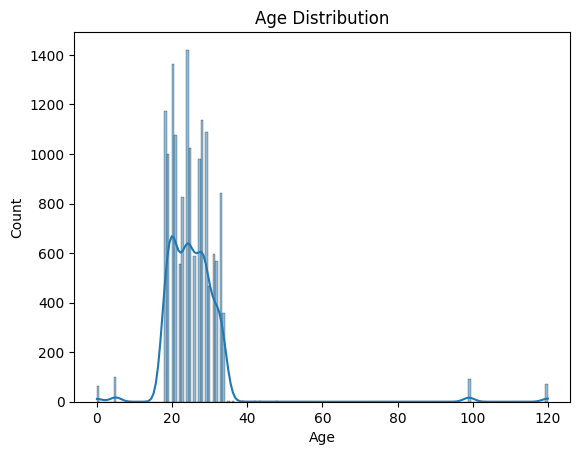

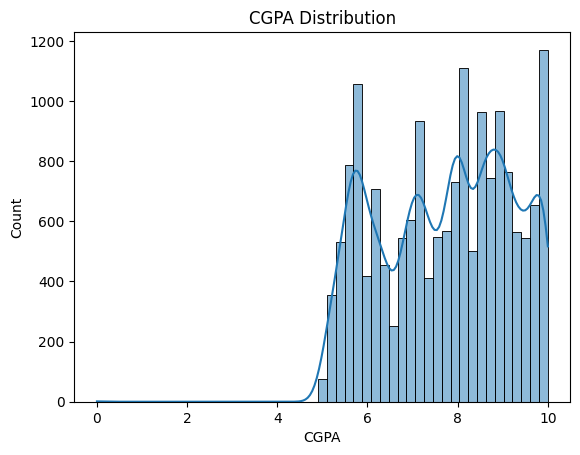

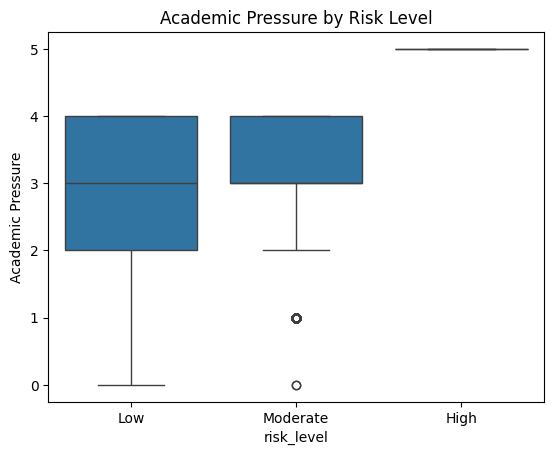

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of Age
sns.histplot(result['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Visualize the distribution of CGPA
sns.histplot(result['CGPA'], kde=True)
plt.title('CGPA Distribution')
plt.show()

# Boxplot for Academic Pressure vs Risk Level
sns.boxplot(x='risk_level', y='Academic Pressure', data=result)
plt.title('Academic Pressure by Risk Level')
plt.show()

## Data cleaning

Now that there is a better overview of the distribution of the features I can determine how to fill the missing values in the dataset and I have identified which columns have problematic outliers or values with typos and can start cleaning.

In [214]:
# Note that the datatype errors have already been fixed automatically during the
# transformation from SQLite to Pandas dataframe and duplicates fixed during EDA
# As well as some outliers removed in the SQL query filtering.

# Fix typos
def fixtypo_gender(g):
    g = str(g).strip().capitalize()  # Normalize case/whitespace
    if g in ['Male', 'Mle', 'M', 'Maale']:
        return 'Male'
    elif g in ['Female', 'Femaale', 'Fmale', 'F', 'Femal']:
        return 'Female'
    else:
        return g

df.loc[:, 'Gender'] = df['Gender'].apply(fixtypo_gender)

In [215]:
df['Gender'].value_counts()

,count
Gender,
Male,4819
Female,3882
None,887


In [216]:
# Fix outliers
# Note that extreme/unrealistic outliers in CGPA have been removed during SQL
# rationale for keeping the remaining will be discussed in the actual dataset.

df = df[(df['Age'] >= 18) & (df['Age'] <= 80)]

This removes students under 18 and over 80, which are unrealistic ages for this purpose, how to handle unusually high but valid ages like 40+ will be discussed later.

In [217]:
# Handling missing values


In [218]:
# Save the filtered, cleaned dataframe to CSV to work with in the future
df.to_csv('/content/drive/MyDrive/Datasets/filtered_cleaned_corrupted_dataset.csv', index=False)

This saves the progress, but the project now continues with the original, uncorrupted dataset.

# Imports

In [219]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
     f1_score, auc, classification_report, roc_curve, confusion_matrix)

# Exploratory Data Analysis

## Basic Overview

In [220]:
# Load the original dataset again
df  = pd.read_csv(file_path)

In [221]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [222]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [223]:
df.shape

(27901, 18)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [225]:
df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]) # 1% and 99% can offer valuable information

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1370.000000,18.000000,1.000000,0.000000,5.110000,1.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
99%,139299.000000,34.000000,5.000000,0.000000,9.960000,5.000000,0.000000,12.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


I notice a significant difference between the minimum and the 1% values of: Academic Pressure, CGPA and Study Satisfaction - and between the maximum and the 99% of Age, Work Pressure and Job Satisfaction which may be natural outliers or data entry errors.

## Advanced Descriptives

In [226]:
# Summary statistics for the Object columns
df.describe(include='O').T # Transposed for readability

,count,unique,top,freq
Gender,27901,2,Male,15547
City,27901,52,Kalyan,1570
Profession,27901,14,Student,27870
Sleep Duration,27901,5,'Less than 5 hours',8310
Dietary Habits,27901,4,Unhealthy,10317
Degree,27901,28,'Class 12',6080
Have you ever had suicidal thoughts ?,27901,2,Yes,17656
Financial Stress,27901,6,5.0,6715
Family History of Mental Illness,27901,2,No,14398


In [227]:
# Showing the 15 smallest or largest values of suspect features side by side
pd.concat([
    df['Age'].nlargest(15).reset_index(drop=True),
    df['Academic Pressure'].nsmallest(15).reset_index(drop=True),
    df['CGPA'].nsmallest(15).reset_index(drop=True),
    df['Work Pressure'].nlargest(15).reset_index(drop=True),
    df['Study Satisfaction'].nsmallest(15).reset_index(drop=True),
    df['Job Satisfaction'].nlargest(15).reset_index(drop=True)
], axis=1)

,Age,Academic Pressure,CGPA,Work Pressure,Study Satisfaction,Job Satisfaction
0,59.0,0.0,0.00,5.0,0.0,4.0
1,58.0,0.0,0.00,5.0,0.0,4.0
2,56.0,0.0,0.00,2.0,0.0,3.0
3,54.0,0.0,0.00,0.0,0.0,2.0
4,51.0,0.0,0.00,0.0,0.0,2.0
5,49.0,0.0,0.00,0.0,0.0,2.0
6,48.0,0.0,0.00,0.0,0.0,1.0
7,48.0,0.0,0.00,0.0,0.0,1.0
8,48.0,0.0,0.00,0.0,0.0,0.0
9,46.0,1.0,5.03,0.0,0.0,0.0


In [228]:
# Checking for duplicates
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [229]:
# Check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [230]:
# Getting the value counts as a ratio of all object-based features

# Dropping high-cardinality column: City
df_valuecounts = df.drop(columns=['City'])

# Converting object columns to strings
for col in df_valuecounts.select_dtypes(include='object').columns:
    df_valuecounts[col] = df_valuecounts[col].astype(str)

# Loop through each categorical column and print its value proportions
for col in df_valuecounts.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(df_valuecounts[col].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))


--- Gender ---
Gender
Male      55.72%
Female    44.28%
Name: proportion, dtype: object

--- Profession ---
Profession
Student                     99.89%
Architect                    0.03%
Teacher                      0.02%
'Digital Marketer'           0.01%
Chef                         0.01%
'Content Writer'             0.01%
Pharmacist                   0.01%
Doctor                       0.01%
'UX/UI Designer'             0.00%
'Civil Engineer'             0.00%
Manager                      0.00%
'Educational Consultant'     0.00%
Lawyer                       0.00%
Entrepreneur                 0.00%
Name: proportion, dtype: object

--- Sleep Duration ---
Sleep Duration
'Less than 5 hours'    29.78%
'7-8 hours'            26.33%
'5-6 hours'            22.16%
'More than 8 hours'    21.66%
Others                  0.06%
Name: proportion, dtype: object

--- Dietary Habits ---
Dietary Habits
Unhealthy    36.98%
Moderate     35.56%
Healthy      27.42%
Others        0.04%
Name: proportion, 

In [231]:
# Correlation
numeric_df = df.select_dtypes(include=['int64', 'float64']) #Get numeric columns

correlation_target = numeric_df.corr()['Depression'].sort_values(ascending=False)

# Drop the self-correlation (depression with itself = 1)
correlation_target = correlation_target.drop('Depression')

# Show result
print('Correlation of featues with Depression:')
print(correlation_target)

Correlation of featues with Depression:
Academic Pressure     0.474835
Work/Study Hours      0.208563
CGPA                  0.022210
id                    0.000923
Work Pressure        -0.003351
Job Satisfaction     -0.003482
Study Satisfaction   -0.167971
Age                  -0.226422
Name: Depression, dtype: float64


Academic Pressure and work/sturdy hours are positively correlated with Depression, Age and Study Satisfaction are negitvely correlated with depression.

This might indicate that 18/19 year olds either in their last year of High School or first year of college face the most academic pressure, potentially also pressure from parents to do well and perhaps study something they don't want to while older students in their Masters or PhD are eleviated from that. Studying more might mean there is feeling of being behind and having to keep up with the material, or less quality time, perhaps due to the Depression itself which can have adverse effects on memory.

## Visualization

Visualizing the data to get a different view and see how potential outliers may or may not affect the distribution of various features

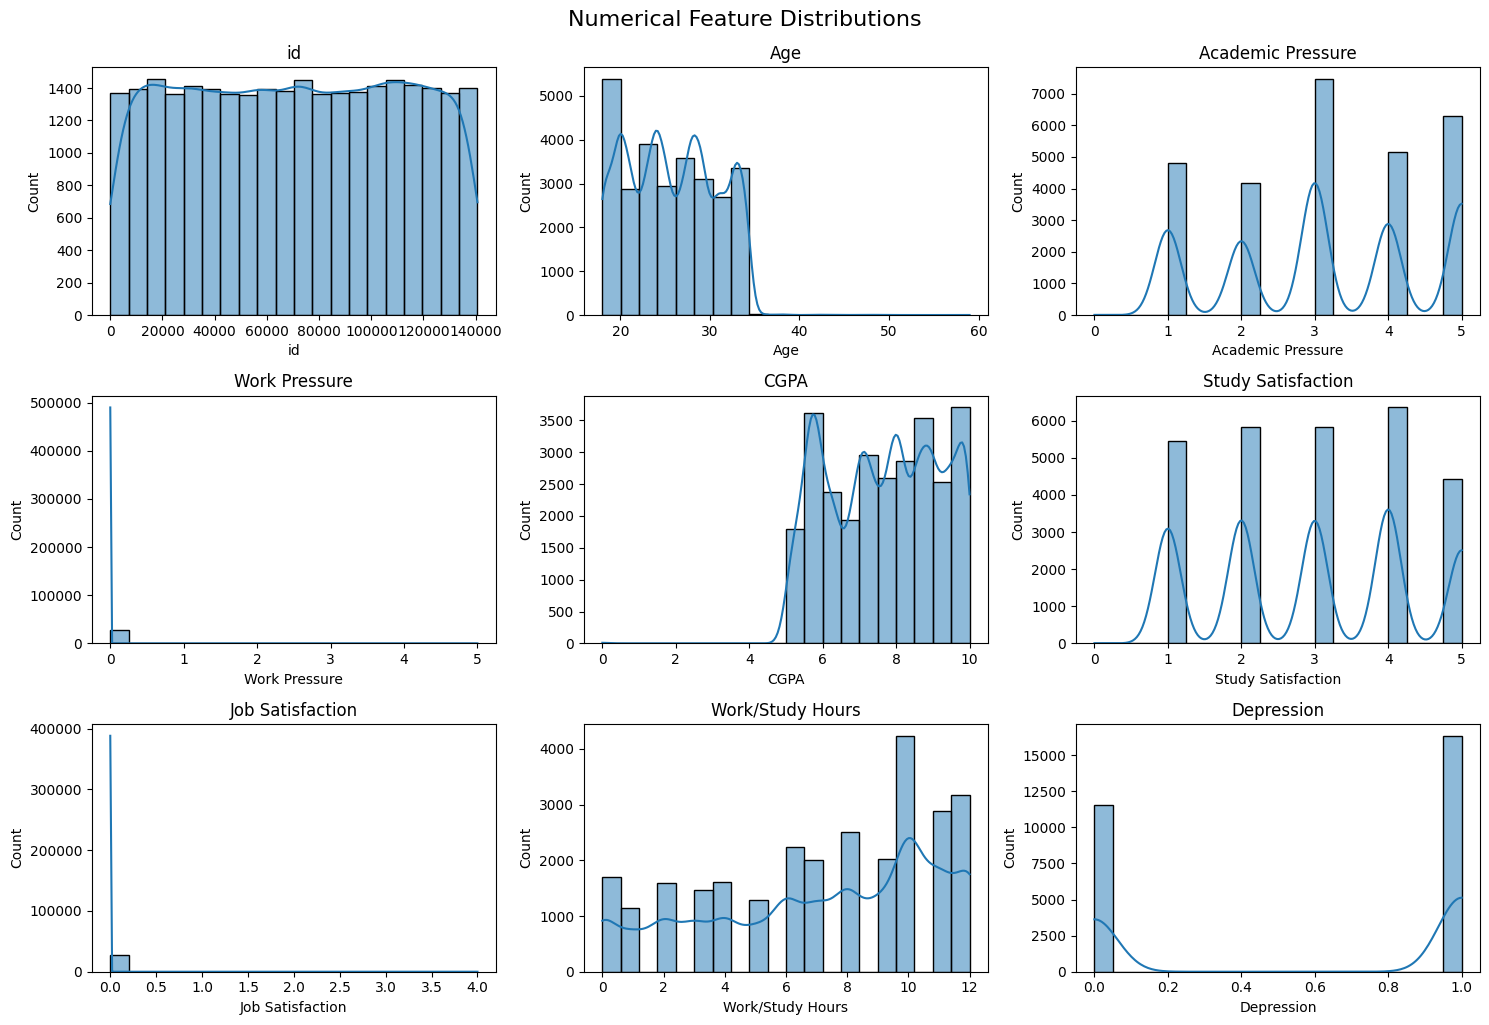

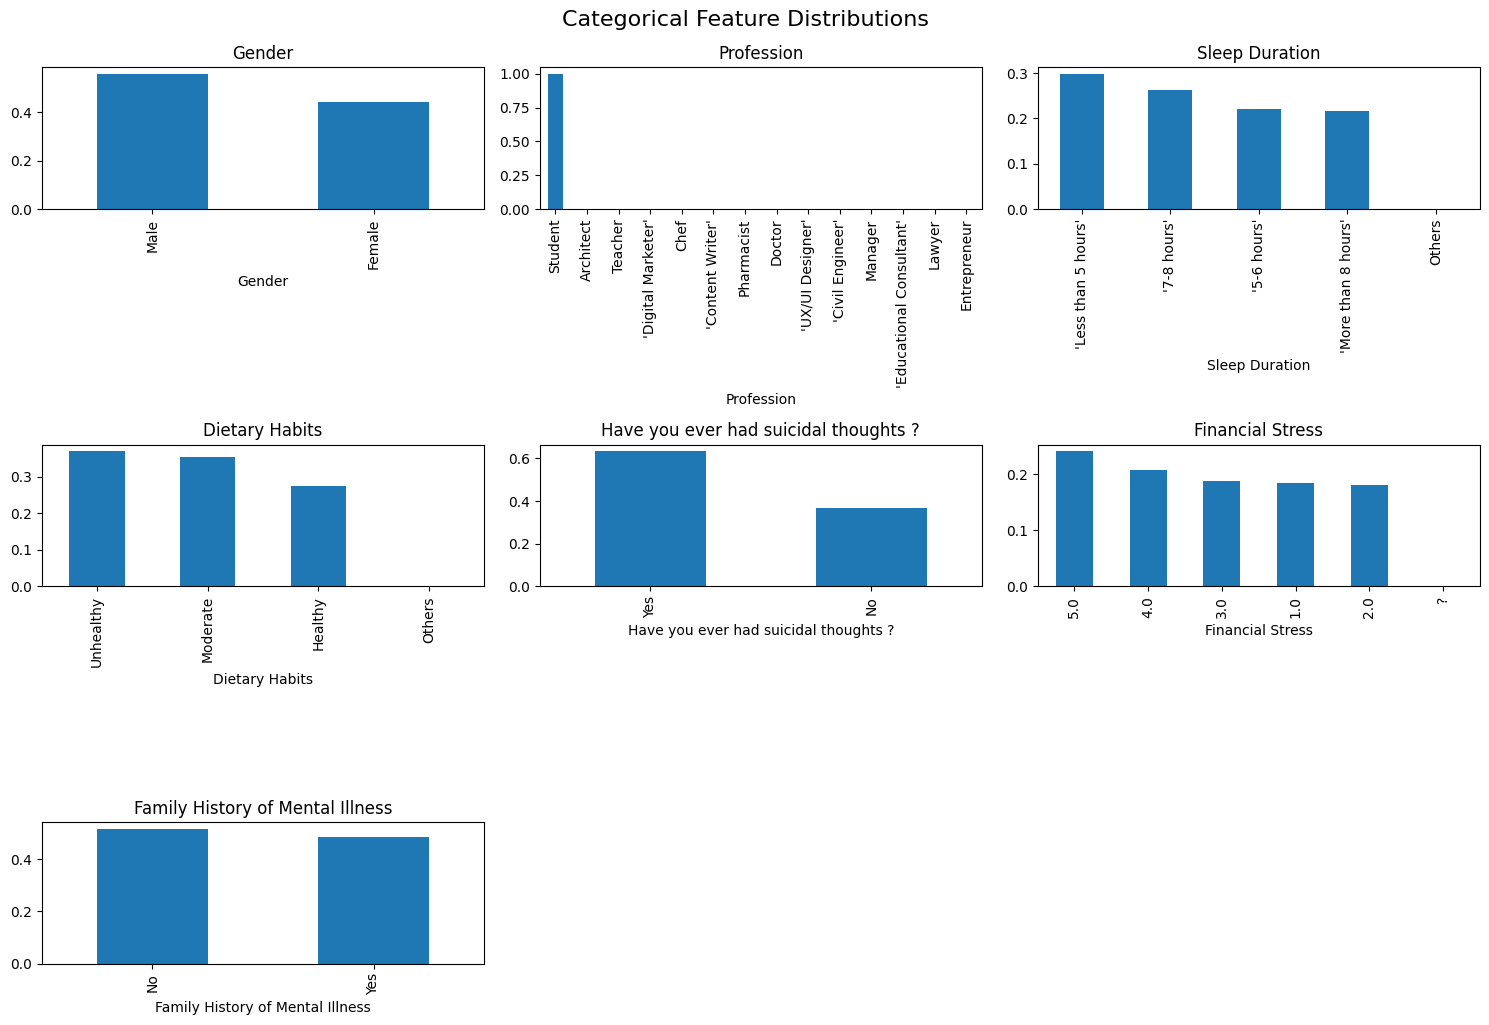

In [232]:
# Separating the features for histogramm / bar plot
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

# NUMERICAL FEATURES
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=20)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Numerical Feature Distributions", fontsize=16, y=1.02)
plt.show()

# CATEGORICAL FEATURES
# Filtering for fewer unique values (Degree/City - filtered)
cat_cols = [col for col in cat_cols if df[col].nunique() <= 20]

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot((len(cat_cols) + 2) // 3, 3, i)
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Categorical Feature Distributions", fontsize=16, y=1.02)
plt.show()

**Sleep** is even for college students incredibly short with less than 5 hours per day being the most common response. Would have expected a bell curve but the responses rather plateau.

**Suicidal Thoughts** with a 63% rate of positive responses seems very high! In the west it tends to be around 5% for the last year and 10-15% lifetime prevalency. Developing countries tend to have a higher rate, especially when family pressure is high, which is often the case in Asia. Even though the wording is broad "ever had" -> no recency requirements it is around 20% higher than in other studies [44% - Sharma et al., 2020 (India)]

**Family History of Mental Illness** has a lot of positive responses (48%) in this dataset, which is surprising, studies tend to have 10-25% positive reports, additionally Asia tend to underreport due to Stigma and Family reputation, on top of that the answer to that may not be known especially to young individuals.

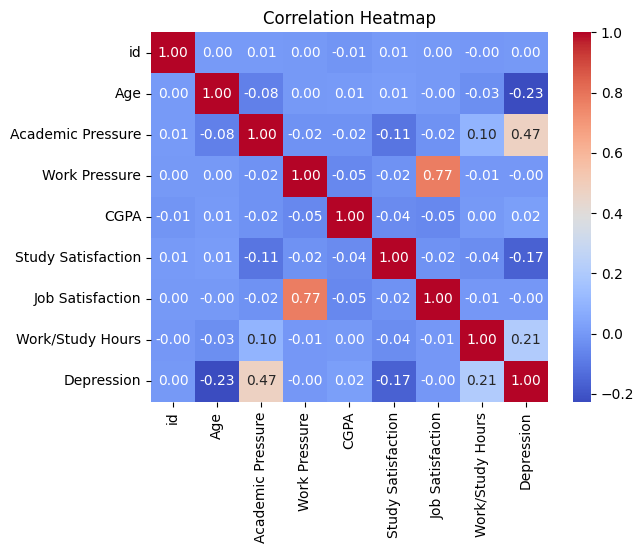

In [233]:
# Correlation Heatmap
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

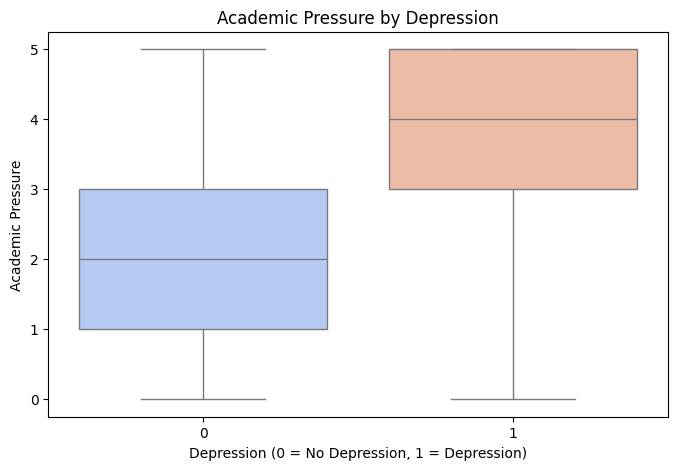

In [234]:
# Plotting Academic Pressure by Depression
plt.figure(figsize=(8,5))
sns.boxplot(x='Depression', y='Academic Pressure', data=df, palette="coolwarm")
plt.title("Academic Pressure by Depression")
plt.xlabel("Depression (0 = No Depression, 1 = Depression)")
plt.ylabel("Academic Pressure")
plt.show()


The heatmap had revealed a high posivite correlation for Academic Pressure and Depression, which the boxplot clearly indicates as well. Within a Likert-Scale of 5, there is a 2-point difference between the means of depressed vs. not depressed students.

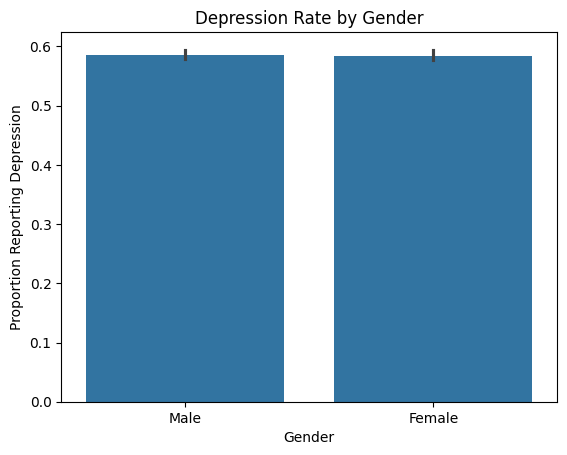

Gender
Female    0.584507
Male      0.586287
Name: Depression, dtype: float64


In [235]:
# Depression by Gender
sns.barplot(data=df, x='Gender', y='Depression')
plt.title('Depression Rate by Gender')
plt.ylabel('Proportion Reporting Depression')
plt.show()
print(df.groupby('Gender')['Depression'].mean())

Surprisingly gender has no effect on Depression rates. While it is established that women are more often diagnosed, it is also the case that men less often seek  help, leading to less diagnoses, often due to stigma. In this study the participants may be in an academic environment, and anonymous and as such men are not underreporting. Additionally, I would make the educated guess that young men in India face more pressure from their family regarding academic performance. These two factors may balance out the expectations.

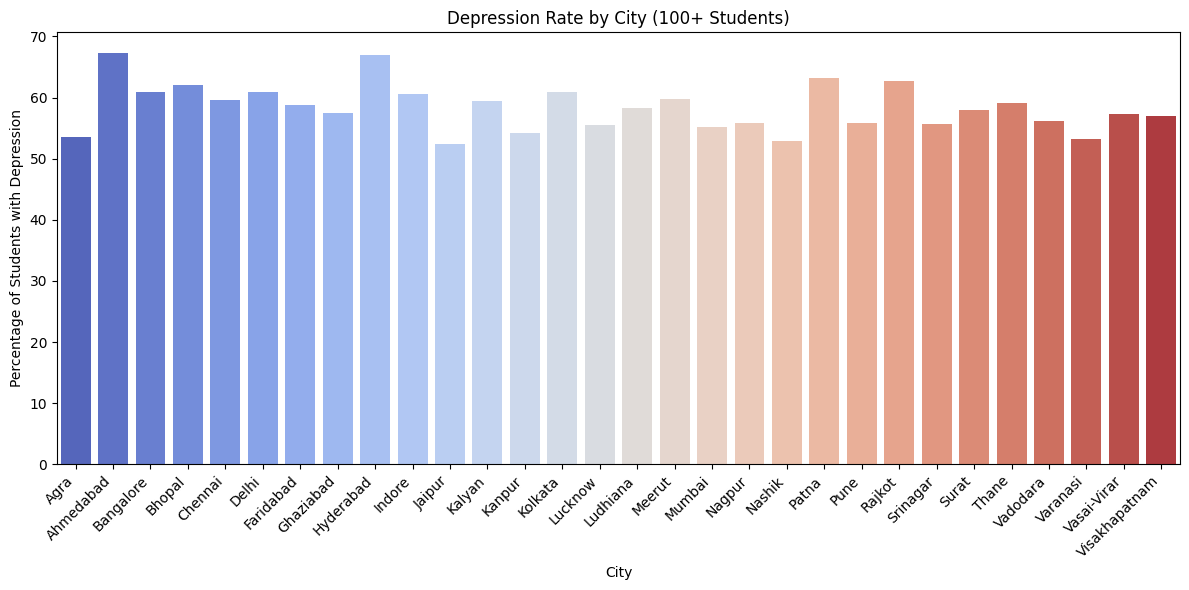

In [236]:
# Depression ratio by City
plt.figure(figsize=(12,6))
sns.barplot(  # Ignores cities with 1 or 2 students
    data=df[df['City'].isin(df['City'].value_counts()[lambda x: x >= 100].index)]
        .groupby('City')['Depression']
        .mean()
        .mul(100)
        .reset_index(),
    x='City', y='Depression', palette='coolwarm'
)
plt.xticks(rotation=45, ha='right')
plt.title('Depression Rate by City (100+ Students)')
plt.ylabel('Percentage of Students with Depression')
plt.xlabel('City')
plt.tight_layout()
plt.show()

Although there is potentially significant differences between cities, it doesn't look out of the ordinary and leads me to believe it is fine to drop the City feature before modeling because there is high cardinality which may add more noise than benefit.

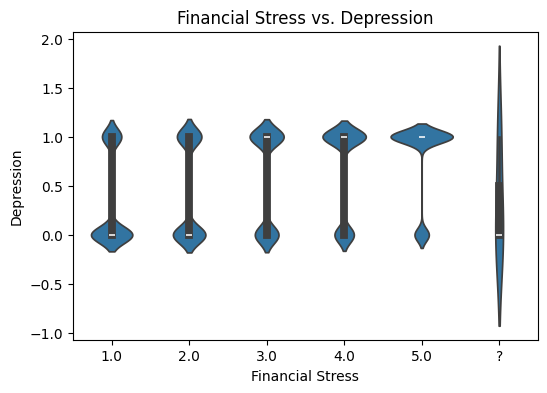

In [237]:
# Violin Plot of Financial Stress vs. Depression
plt.figure(figsize=(6, 4))
sns.violinplot(
    x='Financial Stress',
    y='Depression',
    data=df,
    order=sorted(df['Financial Stress'].unique()) # ascending order
)
plt.title("Financial Stress vs. Depression")
plt.show()


Can see nicely that as Financial Stress increases, so does the area on top of the violin plot where depression is 1 (Also erroneous data '?')

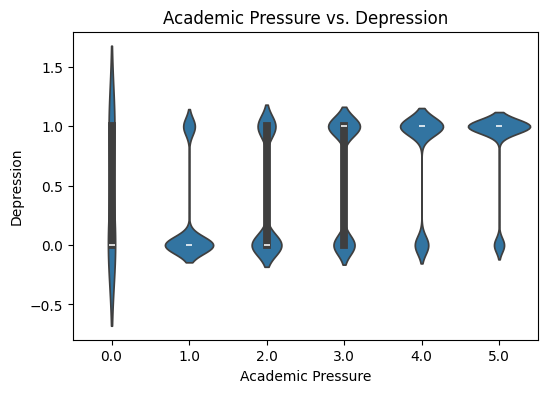

In [238]:
# Violin Plot of Academic Pressure vs. Depression
plt.figure(figsize=(6, 4))
sns.violinplot(
    x='Academic Pressure',
    y='Depression',
    data=df,
    order=sorted(df['Academic Pressure'].unique()) # ascending order
)
plt.title("Academic Pressure vs. Depression")
plt.show()

Here as well, the positive correlation between Academic Pressure and Depression is nicely visualized. The 0.0 Academic Pressure sample size is likely too small leading to an overshoot of the Depression. Should think about removing those outliers.

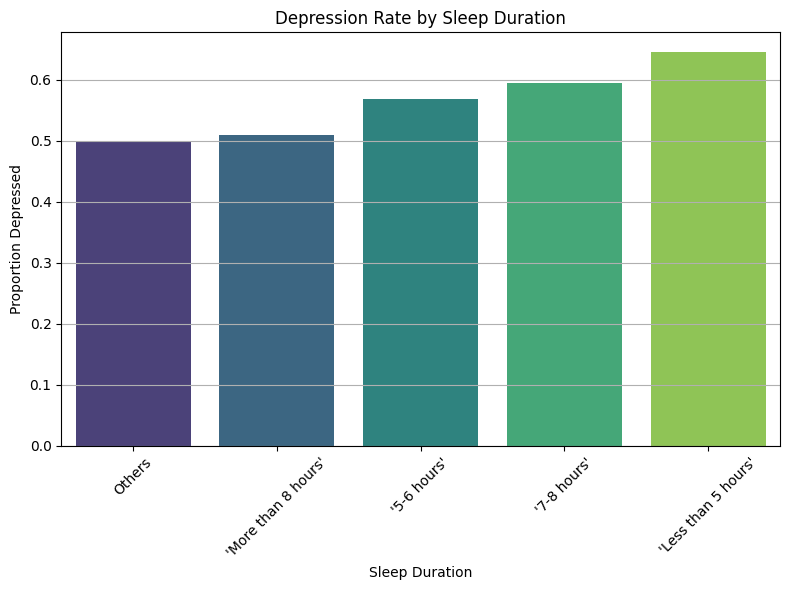

In [239]:
# Depression by amount of sleep
sleep_depression = df.groupby('Sleep Duration')['Depression'].mean().sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=sleep_depression.index, y=sleep_depression.values, palette='viridis')
plt.ylabel("Proportion Depressed")
plt.xlabel("Sleep Duration")
plt.title("Depression Rate by Sleep Duration")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Mostly makes sense except more than 8 hours being less depressed thnan 7-8 is slightly surprising. Perhaps it's mostly 8-9 hour sleepers who can afford to sleep more due to no Academic pressure, otherwise sleeping a lot of hours is a sign of Depression as well.

Note: This plot was added after clustering in a later section that showed surprising results.

# Data Cleaning

During this step, the dataset will be cleaned to be in optimal condition for preprocessing and modeling. Outliers, duplicates, erroneous as well as unncesseary data will be dealt with.

## Debating unusual/erroneous Entries

- **Degree**

The majority of students are in "Class 12" which is the last year of highs chool in India, so they are likely 18 years and may not continue on to university. For clustering purposes these will definitely form a distinct group.
Due to high cardinality there might be a lot of noise, might be best to drop the feature or use domain knowledge to group degrees perhaps not by subjects but academic advancement. Could use feature importance or predictive strength to determine which way to go.

- **Age**

While an age of 40+ for students is definitely rare, it is a natural occurence and should be used to train the model, these outliers could be combined in one bin or they could be capped at the 95th or even 99th percentile.

- **Financial Stress**

'?' entries could represent a 0 which didn't seem to exist as an answer possibility for the students, a valid 'unknown' answer, or a data entry error. Without knowing, removing the rows is the best course of action, especially due to them being a tiny sample size.

- **Academic Pressure**

The 0.0 responses represent less than 0.01% of all answers, therefore could be considered an extreme outlier. While it is unlikely that there is zero academic pressure in an academic setting, it could still be a possible and natural response, however since it represents sucha  tiny minority it is more likely to be noisy data without benefit to the ML model.


## Dropping and Re-Naming Features

In [240]:
# Checking predictive power of City
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

X = df[['City']]
y = df['Depression']

X_encoded = X.copy()
X_encoded['City'] = LabelEncoder().fit_transform(X['City'])

# Measuring how much information one variable contains about another
mi = mutual_info_classif(X_encoded, y, discrete_features=True)
print(f"Mutual Info (City, Depression): {mi[0]:.6f}")

Mutual Info (City, Depression): 0.003534


0.003 is a very low score, indicating that the feature City is not a good predictor for whether or not a student is depressed, which aligns with my suspicion and reassures me I can drop the feature to avoid noise.

In [241]:
X = df[['Degree']]
y = df['Depression']

X_encoded = X.copy()
X_encoded['Degree'] = LabelEncoder().fit_transform(X['Degree'])

mi = mutual_info_classif(X_encoded, y, discrete_features=True)

print(f"Mutual Info (Degree, Depression): {mi[0]:.6f}")

Mutual Info (Degree, Depression): 0.009772


Low score as well. Low predictive power means the feature can be dropped, it's still worth a shot though to use domain knowledge and extract more insights by combining the entries by academic advancement, e.g. High School -> Bachelor -> Master -> Doctor. This is ordinal and the groups may very well face different academic pressure.

In [242]:
# Drop Columns
before_columns = df.shape[1]
df = df.drop(columns=['id', 'City', 'Work Pressure', 'Job Satisfaction', 'Profession'])
after_columns = df.shape[1]

print(f"{before_columns - after_columns} columns removed. Now {after_columns} columns remain.")

5 columns removed. Now 13 columns remain.


In [243]:
# Renaming awkward features
df = df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'})
df = df.rename(columns={'Family History of Mental Illness': 'Family Mental Illness'})

Shorter but still clear naming of the features.

In [244]:
# Transforming binary objects to binary numerical

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Suicidal Thoughts'] = df['Suicidal Thoughts'].map({'No': 0, 'Yes': 1})
df['Family Mental Illness'] = df['Family Mental Illness'].map({'No': 0, 'Yes': 1})

One-hot encodign would do this step anyway, but this way is easier on the memory, cleaner, and easier to read.

ID doesn't predict Depression. City suffers from high cardinality and as seen above has very little predictive power. Work pressure is almost non-existant as only 3 out of almost 28000 students claim to have any work pressure, which makes the feature too imbalanced.

## Duplicates and Missing values

In [245]:
# Remove duplicate rows
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"{before - after} duplicate rows were removed.")

0 duplicate rows were removed.


In [246]:
# Remove rows with missing values(NaN, Null, N/A)
before = len(df)
df = df.dropna()
after = len(df)

print(f"{before - after} rows with missing values were removed.")

0 rows with missing values were removed.


## Outliers

Here I handle extreme values that are unlikely to be beneficial for the ML model.

In [247]:
# Removing rows with 'Others' values.
df = df[~df[['Sleep Duration', 'Dietary Habits', 'Degree']].isin(['Others']).any(axis=1)]

Sleep Duration only had 18 entries 'Others' Which logically could only be between 6 and 7 hours, or students didn't know their average because it is very different from day to day. Removing it makes it so that this feature is set for ordinal encoding.

Same logic applies to Dietary Habits with only 12 entries of 'Others'. Sleep has a few more but it won't work well enough for the upcoming feature engineering.

In [248]:
# Removing rows with '?' values.
df = df[df['Financial Stress'] != '?']

In [249]:
# Removing outliers that were manually identified during EDA
df = df[~((df['Academic Pressure'] == 0) | (df['CGPA'] == 0) | (df['Study Satisfaction'] == 0))]

## Datatypes

In [250]:
# Changing Datatypes
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

As an object it can still be scaled, but the datatype can be problematic for ML models. At this point one could change floats to integers for better performance, but the scaling will do so automatically where appropriate.

# Data Preprocessing

Not required for this proeject due to the combination of domain knowledge and few features in the dataset, but I want to highlight an example where and how to cluster using PCA.

## Feature Engineering

Here I can try to improve upon features by transforming them or combining them

In [251]:
# Capping age at the 99th percentile
age_cap = df['Age'].quantile(0.99)
capped_count = (df['Age'] > age_cap).sum()

df.loc[:, 'Age'] = df['Age'].clip(upper=age_cap)

print(f"Age capped at 99th percentile: {age_cap:.2f} years")
print(f"Number of rows affected: {capped_count}")

Age capped at 99th percentile: 34.00 years
Number of rows affected: 47


This handles the outliers without removing the data entirely, it keeps the amount of older students but makes it easier for the ML models to handle.

It may be worth a try to bin the ages later if the model is not satisfying.

In [252]:
# Custom Grouping Degrees
degree_map = {
    'Class 12': 'High School',
    'B.Com': 'Undergraduate', 'B.Arch': 'Undergraduate', 'BCA': 'Undergraduate',
    'B.Tech': 'Undergraduate', 'BHM': 'Undergraduate', 'BSc': 'Undergraduate',
    'B.Pharm': 'Undergraduate', 'BBA': 'Undergraduate', 'MBBS': 'Undergraduate',
    'LLB': 'Undergraduate', 'BE': 'Undergraduate', 'BA': 'Undergraduate',
    'B.Ed': 'Undergraduate',

    'MSc': 'Postgraduate', 'MCA': 'Postgraduate', 'M.Tech': 'Postgraduate',
    'M.Ed': 'Postgraduate', 'M.Com': 'Postgraduate', 'M.Pharm': 'Postgraduate',
    'MBA': 'Postgraduate', 'MA': 'Postgraduate', 'LLM': 'Postgraduate',
    'MHM': 'Postgraduate', 'ME': 'Postgraduate',

    'PhD': 'Doctorate', 'MD': 'Doctorate'
}

df['Degree Grouped'] = df['Degree'].map(degree_map)
df = df.drop(columns=['Degree'])
df = df[df['Degree Grouped'].notna()] # Remove NaN of 2 unmapped degrees

Here I can still make up my mind if I want to one-hot encode the degrees nominaly or ordinaly. There is a natural order to this feature, but for predicting depression it is possible that both ends show the highest rates (High school students and Ph.D students).

## Encoding

In [253]:
# Ordinal Encoding
degree_order = {'High School': 0, 'Undergraduate': 1, 'Postgraduate': 2, 'Doctorate': 3}
df['Degree Ordinal'] = df['Degree Grouped'].map(degree_order)
df = df.drop(columns=['Degree Grouped'])

In [254]:
diet_order = {'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2}
df['Diet Ordinal'] = df['Dietary Habits'].map(diet_order)
df = df.drop(columns=['Dietary Habits'])

In [255]:
# One-hot Encoding of Sleep Duration (Nominal)
sleep_dummies = pd.get_dummies(df['Sleep Duration'], prefix='Sleep')

# Concatenate with the original dataframe and remove the old feature
df = pd.concat([df.drop(columns=['Sleep Duration']), sleep_dummies], axis=1)

# Convert True/False to 1/0
df[sleep_dummies.columns] = df[sleep_dummies.columns].astype(int)

In [256]:
# Final overview to see if all the changes are present in the Dataframe
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family Mental Illness,Depression,Degree Ordinal,Diet Ordinal,Sleep_'5-6 hours',Sleep_'7-8 hours',Sleep_'Less than 5 hours',Sleep_'More than 8 hours'
0,1,33.0,5.0,8.97,2.0,1,3.0,1.0,0,1,1,2,1,0,0,0
1,0,24.0,2.0,5.90,5.0,0,3.0,2.0,1,0,1,1,1,0,0,0
2,1,31.0,3.0,7.03,5.0,0,9.0,1.0,1,0,1,2,0,0,1,0
3,0,28.0,3.0,5.59,2.0,1,4.0,5.0,1,1,1,1,0,1,0,0
4,0,25.0,4.0,8.13,3.0,1,1.0,1.0,0,0,2,1,1,0,0,0


## Optional: Clustering

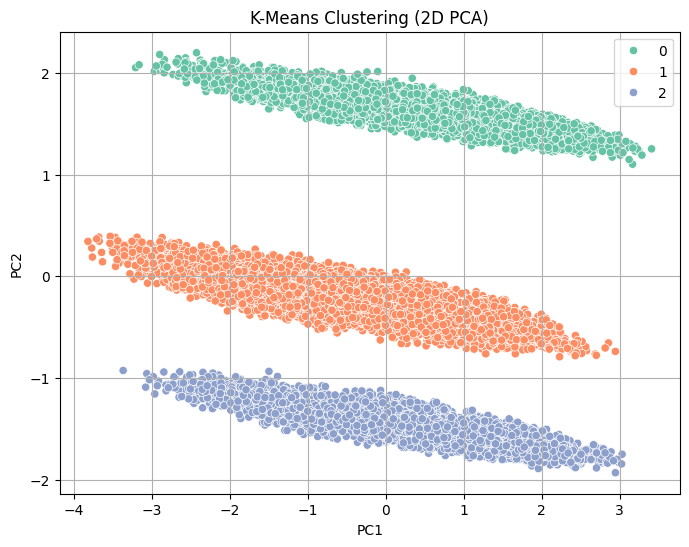

In [257]:
# Principal Component Analysis
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = df.drop('Depression', axis=1)
y = df['Depression']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=69) # 3 clusters
clusters = kmeans.fit_predict(X_scaled)

# Optional: reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2")
plt.title("K-Means Clustering (2D PCA)")
plt.xlabel("PC1") # Principal component 1
plt.ylabel("PC2")
plt.grid()
plt.show()

In [258]:
# Compare the clusters on target(Depression) proportions
df_encoded = df.copy()
df_encoded['cluster'] = clusters
df_encoded.groupby('cluster')['Depression'].value_counts(normalize=True)

cluster  Depression
0        1             0.612645
         0             0.387355
1        1             0.502212
         0             0.497788
2        1             0.563485
         0             0.436515
Name: proportion, dtype: float64

Cluster 1 are clearly the least depressed, so this group might be more resilient, for example higher age, less study hours, more sleep, less Academic Pressure, etc.

In [259]:
# Mean of features by cluster
df_encoded.groupby('cluster').mean()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family Mental Illness,Depression,Degree Ordinal,Diet Ordinal,Sleep_'5-6 hours',Sleep_'7-8 hours',Sleep_'Less than 5 hours',Sleep_'More than 8 hours'
cluster,,,,,,,,,,,,,,,,
0,0.562992,27.344487,3.170547,7.655564,2.879414,0.652429,7.150193,3.101311,0.488666,0.612645,1.428836,0.909638,0.000000,0.0,1.0,0.000000
1,0.555731,27.483565,3.018542,7.673523,2.928782,0.581858,7.043194,3.077750,0.483670,0.502212,1.438791,0.934050,0.512432,0.0,0.0,0.487568
2,0.555517,27.314395,3.082280,7.697488,2.899706,0.634159,7.236099,3.139269,0.472891,0.563485,1.447428,0.900225,0.000000,1.0,0.0,0.000000


Interesting, this reveals that the cluster 1 is for irregular sleepers of more than 8 as well as less than 5 hours. One would assume these would belong the most depressed cluster not the least as irregular sleep is a sign of depression. At this point one could delve deeper into understanding the groups, but for this project the small side-tour ends here.

## Splitting the Data to Test/Train

Here I am splitting the Data into test/train. Train so the model can learn from it and test (unseen data) to validate what the model has learned.

In [260]:
# Splitting the data 80/20 (Can think about 90/10 in case of cross-validation)
X = df.drop(columns=['Depression'])
y = df['Depression']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y) # stratify so Depression is evenly distributed in test and train

I am specifically calling the X data raw because I am going to create another scaled version to feed the ML models with their most desired type of data.

## Scaling

I am scaling the data because some ML models (SVM, KNN, Logistic Regression)only properly work when the data's values are similar in magnitude. Although Age isn't as big as salary, it is nonetheless multitudes higher than then liker-scale values of 1 through 5.

In [261]:
# Scaling the Data
scaler = StandardScaler()
X_train_scaled = X_train_raw.copy()
X_test_scaled = X_test_raw.copy()

# Choosing the features that need sclaing (non-binary 0/1)
features_to_scale = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
                     'Work/Study Hours', 'Financial Stress', 'Degree Ordinal', 'Diet Ordinal']

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train_scaled[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test_scaled[features_to_scale])

# Machine Learning

Here I will employ multiple different Machine learning models, use hypertuning to improve their accuracy metrics and then compare them with each other.

## Logistic Regression

In [262]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Metric output
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1951
           1       0.86      0.88      0.87      2399

    accuracy                           0.85      4350
   macro avg       0.85      0.85      0.85      4350
weighted avg       0.85      0.85      0.85      4350



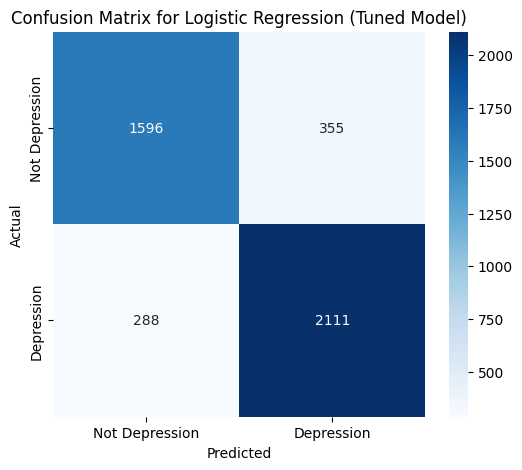

In [263]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=['Not Depression', 'Depression'], yticklabels=['Not Depression', 'Depression'])
plt.title('Confusion Matrix for Logistic Regression (Tuned Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [264]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Strenght of regularization
    'penalty': ['l1', 'l2', 'elasticnet'], # Can zero out or shrink features
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)

Best Params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [265]:
# Run Logistic Regression model again with best parameters
lr_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)
lr_best.fit(X_train_scaled, y_train)

y_pred_lr = lr_best.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1951
           1       0.86      0.88      0.87      2399

    accuracy                           0.85      4350
   macro avg       0.85      0.85      0.85      4350
weighted avg       0.85      0.85      0.85      4350



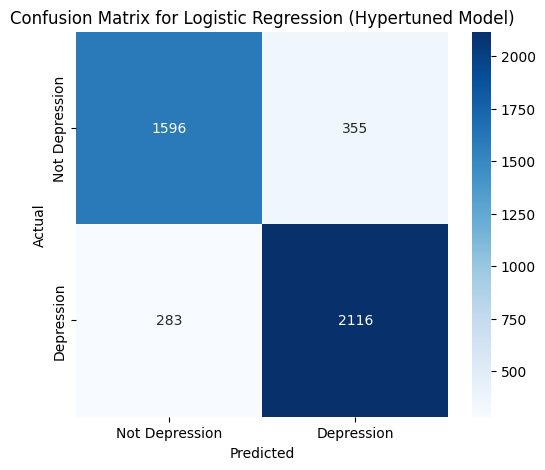

In [266]:
# Confusion matrix for the hypertuned model
cm_hyper_lr = confusion_matrix(y_test, y_pred_lr)  # y_pred_lr comes from the tuned model (lr_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_hyper_lr, annot=True, fmt="g", cmap="Blues", xticklabels=['Not Depression', 'Depression'], yticklabels=['Not Depression', 'Depression'])
plt.title('Confusion Matrix for Logistic Regression (Hypertuned Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [267]:
# Comparing original with hypertuned model since output was identical
print((lr_model.predict(X_test_scaled) == lr_best.predict(X_test_scaled)).mean())

0.9970114942528736


This shows that there is a tiny difference, but they are almost identical, indicating that the default model did a good job already, or the dataset is fairly simple (clean, balanced, informative).

As seen in the Confusion Matrix however, the False negatives have been lowered by 5, which is the worst outcome, predicting no depression when the student actually has depression. This needs to be avoided at all costs, so the hypertuning made a small but positive difference.

## KNN

In [268]:
# K-Nearest-Neighbors model
knn_model = KNeighborsClassifier()

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      1951
           1       0.82      0.85      0.83      2399

    accuracy                           0.81      4350
   macro avg       0.81      0.81      0.81      4350
weighted avg       0.81      0.81      0.81      4350



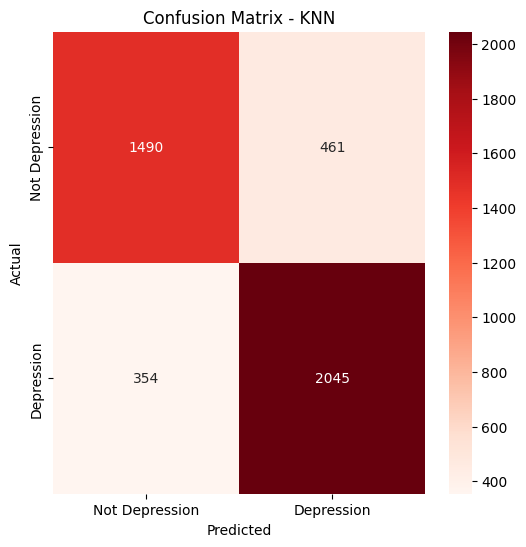

In [269]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion Matrix of KNN
plt.figure(figsize=(6, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Depression', 'Depression'], yticklabels=['Not Depression', 'Depression'])
plt.title("Confusion Matrix - KNN")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [270]:
# Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan distance, 2 = Euclidean distance
}

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1, verbose=1)

grid_knn.fit(X_train_scaled, y_train)

# Printing the best parameters and best score
print("Best KNN Parameters:", grid_knn.best_params_)
print("Best KNN F1 Score (CV):", grid_knn.best_score_)

# Using the best estimator to predict
best_knn = grid_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_scaled)

# KNN metrics
print("Classification Report (Best KNN):")
print(classification_report(y_test, y_pred_best_knn))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN Parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best KNN F1 Score (CV): 0.8410957732686318
Classification Report (Best KNN):
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1951
           1       0.83      0.88      0.85      2399

    accuracy                           0.83      4350
   macro avg       0.83      0.83      0.83      4350
weighted avg       0.83      0.83      0.83      4350



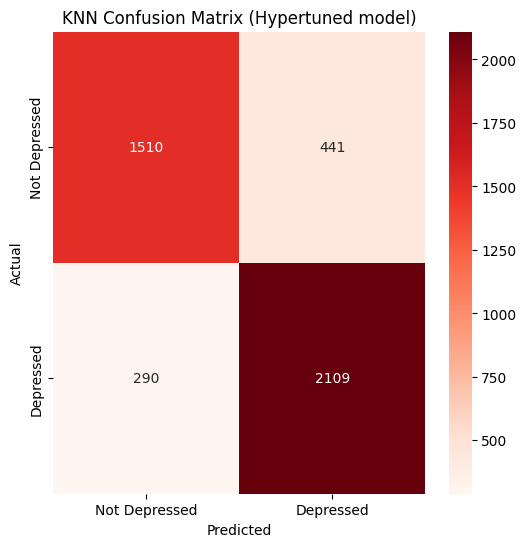

In [271]:
# Confusion matrix for Hyper KNN
cm_hyper_knn = confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(6,6))
sns.heatmap(cm_hyper_knn, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("KNN Confusion Matrix (Hypertuned model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

A significant improvement over the default KNN, both in the confusion matrix and the metrics report.

## SVM

In [272]:
# Support Vector Machine model
svm_default = SVC(probability=True) # Needed for ROC
svm_default.fit(X_train_scaled, y_train)

y_pred_default = svm_default.predict(X_test_scaled)

print("Default SVM Classification Report:")
print(classification_report(y_test, y_pred_default))

Default SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1951
           1       0.86      0.88      0.87      2399

    accuracy                           0.85      4350
   macro avg       0.85      0.85      0.85      4350
weighted avg       0.85      0.85      0.85      4350



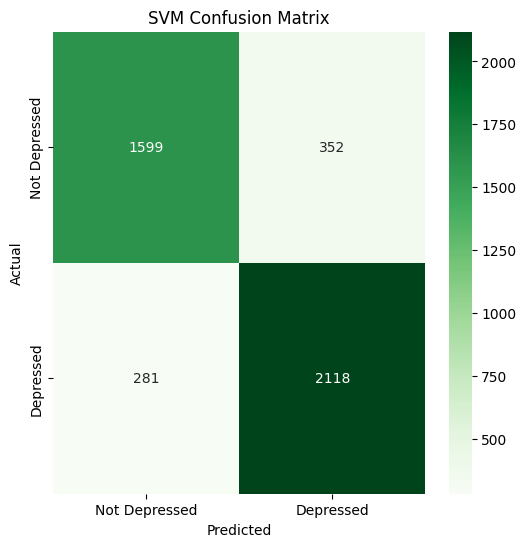

In [273]:
# Confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred_default)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [274]:
# WARNING: This may take time - feel free to skip (10 minutes for me)
# Hypertuning the Support Vector Machine model
param_grid_svm = {
    'C': [0.1, 1, 10],           # Regularization strength
    'kernel': ['linear', 'rbf'], # Try both linear and RBF
    'gamma': ['scale', 'auto']   # For RBF kernel
}

svm = SVC()

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1, verbose=1)

grid_svm.fit(X_train_scaled, y_train)

# Printing the best parameters and best score
print("Best SVM Parameters:", grid_svm.best_params_)
print("Best SVM F1 Score (CV):", grid_svm.best_score_)

# Using the best estimator to predict
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

# SVM metrics
print("Classification Report (Best SVM):")
print(classification_report(y_test, y_pred_svm))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM F1 Score (CV): 0.8588444554577744
Classification Report (Best SVM):
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1951
           1       0.86      0.88      0.87      2399

    accuracy                           0.85      4350
   macro avg       0.85      0.85      0.85      4350
weighted avg       0.85      0.85      0.85      4350



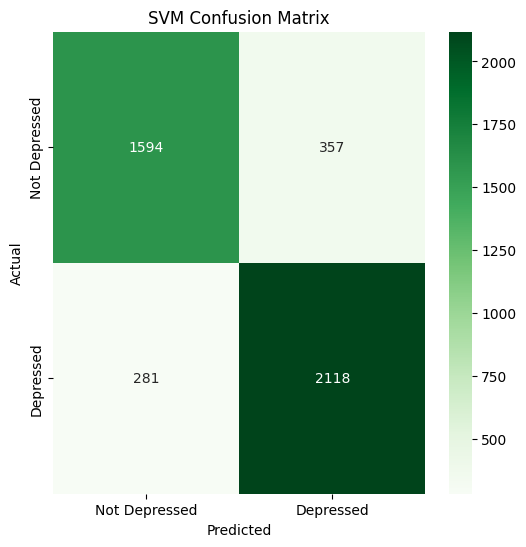

In [275]:
# Confusion matrix for hyper SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

After all that waiting, it actually performs worse, but that can happen. Could spend time tuning it more and see different results in the future.

## XGBoost

**Note:** I am switching from the scaled to the raw data for the next ML models

In [276]:
# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_raw, y_train)

y_pred_xgb = xgb_model.predict(X_test_raw)

# XGBoost metrics
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1951
           1       0.85      0.87      0.86      2399

    accuracy                           0.84      4350
   macro avg       0.84      0.84      0.84      4350
weighted avg       0.84      0.84      0.84      4350



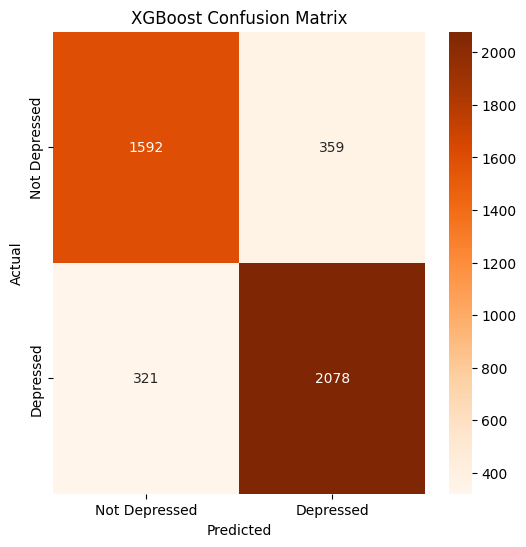

In [277]:
# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [278]:
# Hypertuning XGBoost
xgb = XGBClassifier(eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,
                                scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_search_xgb.fit(X_train_raw, y_train)

# Printing the best parameters
print("Best Parameters for XGBoost:")
print(grid_search_xgb.best_params_)

# Using the best estimator to predict
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_raw)

print("Tuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for XGBoost:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1951
           1       0.86      0.88      0.87      2399

    accuracy                           0.85      4350
   macro avg       0.85      0.85      0.85      4350
weighted avg       0.85      0.85      0.85      4350



Certainly an improvement. I went eays on the grid because it can take a lot of time, it's possible to find better combinations.

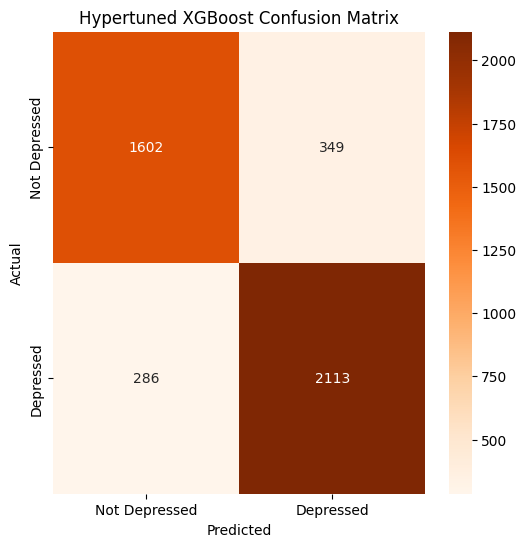

In [279]:
# Confusion matrix for hyper XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Hypertuned XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree

In [280]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=69)
dt_model.fit(X_train_raw, y_train)

y_pred_dt = dt_model.predict(X_test_raw)

# Decision Tree metrics
print("Decision Tree Classification Report (Default):")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report (Default):
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1951
           1       0.80      0.78      0.79      2399

    accuracy                           0.77      4350
   macro avg       0.77      0.77      0.77      4350
weighted avg       0.77      0.77      0.77      4350



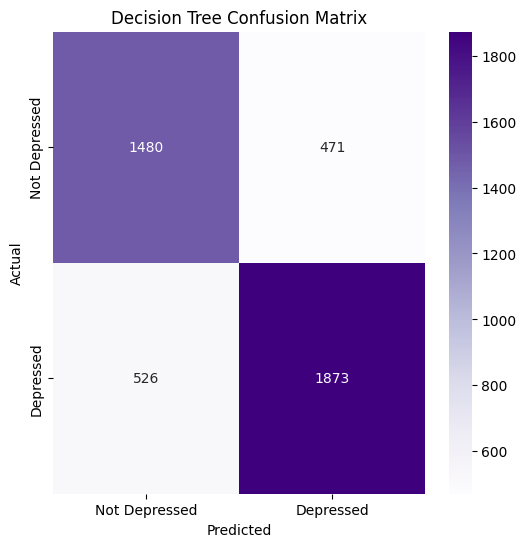

In [281]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [282]:
# Hypertuning the Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    #'ccp_alpha': [0.0, 0.001, 0.01, 0.1] # post-pruning parameter
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=69),
    param_grid=param_grid_dt,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_dt.fit(X_train_raw, y_train)

# Printing best parameters
print("Best Decision Tree Params:", grid_dt.best_params_)

best_dt = grid_dt.best_estimator_
y_pred_dt_best = best_dt.predict(X_test_raw)

# Decision Tree metrics
print("Decision Tree Classification Report (Hypertuned):")
print(classification_report(y_test, y_pred_dt_best))


Best Decision Tree Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Report (Hypertuned):
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1951
           1       0.87      0.82      0.84      2399

    accuracy                           0.83      4350
   macro avg       0.83      0.83      0.83      4350
weighted avg       0.83      0.83      0.83      4350



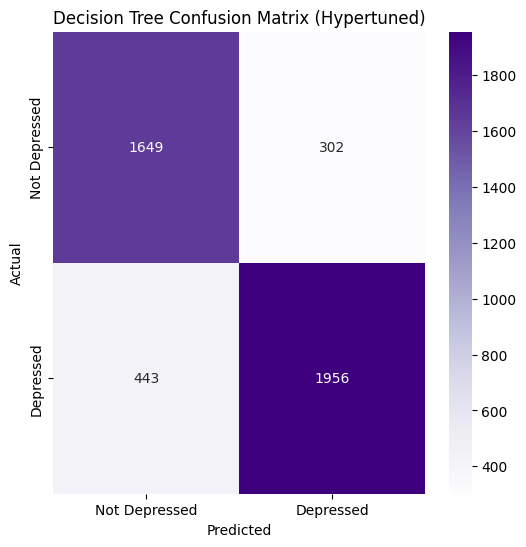

In [283]:
# Confusion Matrix
cm_dt_best = confusion_matrix(y_test, y_pred_dt_best)

plt.figure(figsize=(6,6))
sns.heatmap(cm_dt_best, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Decision Tree Confusion Matrix (Hypertuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Random Forest

In [284]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=69)
rf_model.fit(X_train_raw, y_train)
y_pred_rf = rf_model.predict(X_test_raw)

# Random Forest metrics
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1951
           1       0.86      0.86      0.86      2399

    accuracy                           0.84      4350
   macro avg       0.84      0.84      0.84      4350
weighted avg       0.84      0.84      0.84      4350



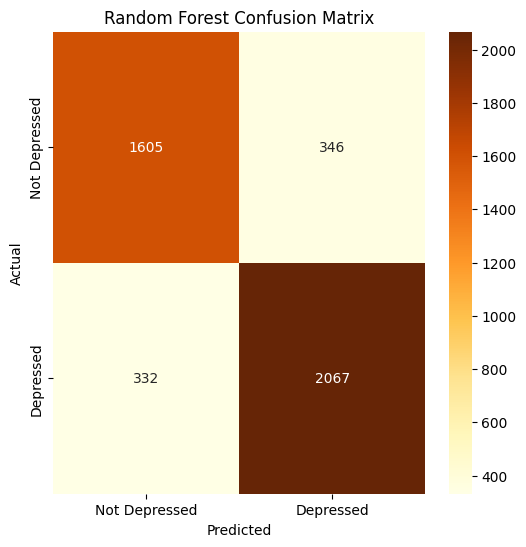

In [285]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [286]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=69), param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train_raw, y_train)

# Printing best parameters
print("Best RF Parameters:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_raw)

# Random Forest metrics
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1951
           1       0.86      0.88      0.87      2399

    accuracy                           0.85      4350
   macro avg       0.85      0.85      0.85      4350
weighted avg       0.85      0.85      0.85      4350



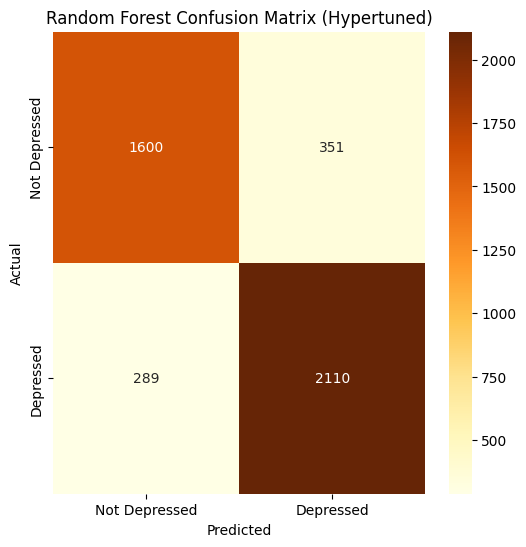

In [287]:
# Confusion matrix for hypertuned Random Forest
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(6,6))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Random Forest Confusion Matrix (Hypertuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Comparison

After seeing all models individually, I want to see how they compare.

In [288]:
models = {
    "Logistic Regression": y_pred_lr,
    "KNN": y_pred_best_knn,
    "SVM": y_pred_svm,
    "XGBoost": y_pred_xgb,
    "Decision Tree": y_pred_dt_best,
    "Random Forest": y_pred_rf_tuned
}
# Have to make sure to choose the correct y_pred variables (Usually hypertuned did better)

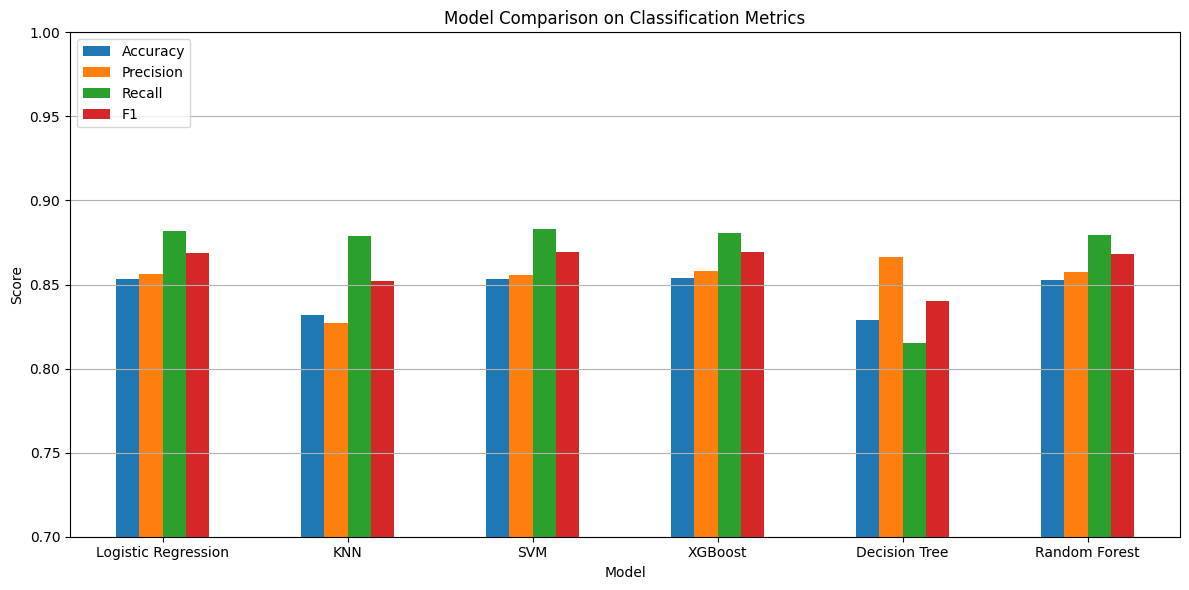

In [289]:
# DataFrame to hold metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Loop through each model's predictions
for name, preds in models.items():
    metrics_df = pd.concat([metrics_df, pd.DataFrame([{
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1': f1_score(y_test, preds)
    }])], ignore_index=True)

# Bar chart with all models and scores
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison on Classification Metrics')
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [290]:
# Simple descriptive comparison
print(metrics_df.set_index('Model').round(3))

                     Accuracy  Precision  Recall     F1
Model                                                  
Logistic Regression     0.853      0.856   0.882  0.869
KNN                     0.832      0.827   0.879  0.852
SVM                     0.853      0.856   0.883  0.869
XGBoost                 0.854      0.858   0.881  0.869
Decision Tree           0.829      0.866   0.815  0.840
Random Forest           0.853      0.857   0.880  0.868


In [291]:
# Probabilities for each model
y_prob_lr = lr_best.predict_proba(X_test_scaled)[:, 1]
y_prob_knn = best_knn.predict_proba(X_test_scaled)[:, 1]
y_scores_svm = best_svm.decision_function(X_test_scaled)  # SVM uses decision_function to save time
y_prob_xgb = best_xgb.predict_proba(X_test_raw)[:, 1]
y_prob_dt = best_dt.predict_proba(X_test_raw)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test_raw)[:, 1]

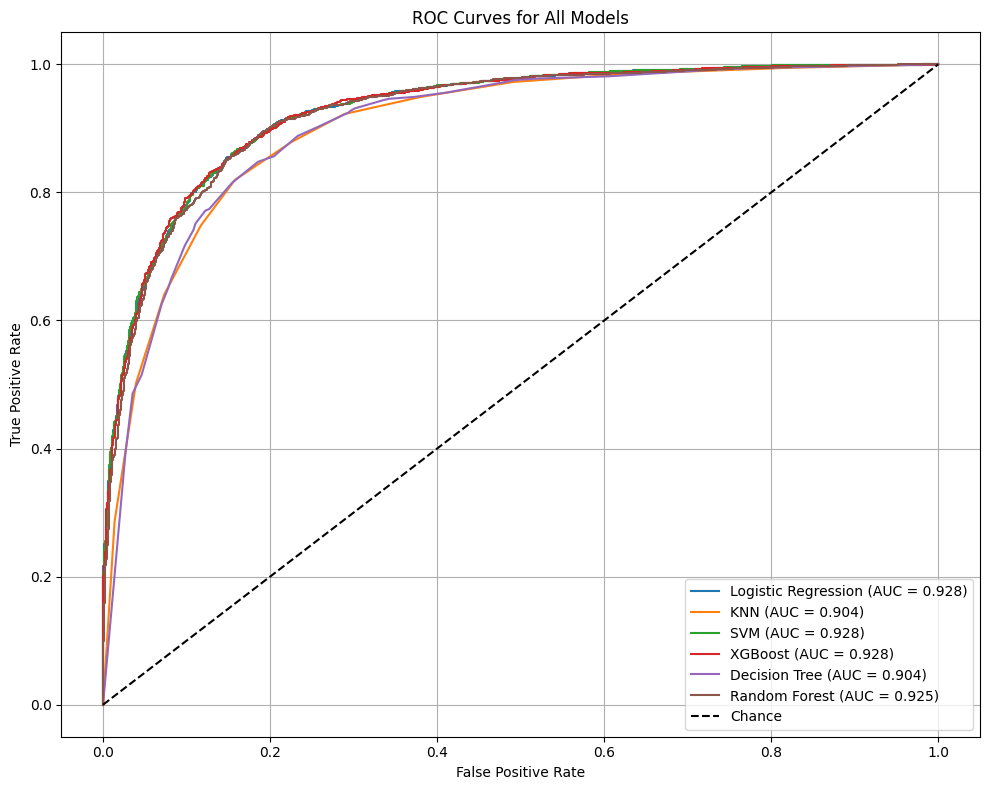

In [292]:
# True labels
y_true = y_test

# Define ROC curves
fpr = {}
tpr = {}
roc_auc = {}

model_probs = {
    "Logistic Regression": y_prob_lr,
    "KNN": y_prob_knn,
    "SVM": y_scores_svm,
    "XGBoost": y_prob_xgb,
    "Decision Tree": y_prob_dt,
    "Random Forest": y_prob_rf
}

# Computing ROC curve and AUC for each model
for name, probs in model_probs.items():
    fpr[name], tpr[name], _ = roc_curve(y_true, probs)
    roc_auc[name] = auc(fpr[name], tpr[name])

# Plotting all ROC curves
plt.figure(figsize=(10, 8))
for name in model_probs.keys():
    plt.plot(fpr[name], tpr[name], label=f'{name} (AUC = {roc_auc[name]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

Logistic Regression, SVM and XGBoost tied for best performance with an Area Under the Curve(AUC) of 0.928. These values suggest that these models have excellent discriminatory power — i.e., they are very good at distinguishing between depressed and non-depressed students across all classification thresholds.

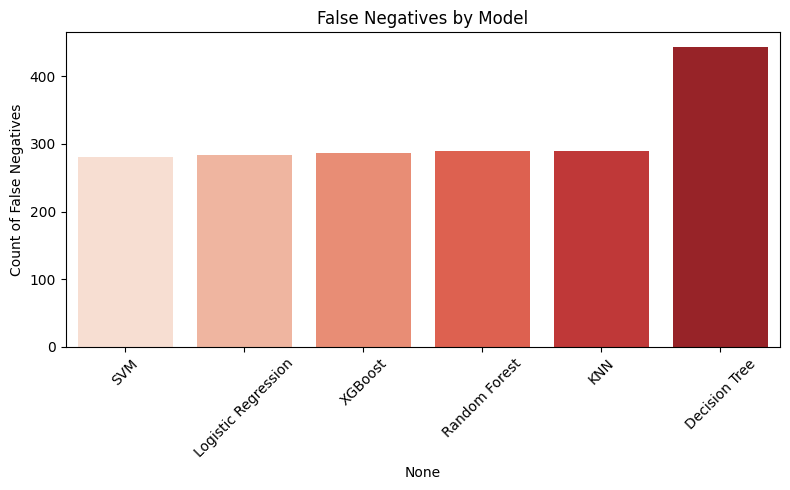

False Negatives per Model:
                     False Negatives
SVM                              281
Logistic Regression              283
XGBoost                          286
Random Forest                    289
KNN                              290
Decision Tree                    443


In [293]:
# Comparing False negatives between the models

# Creating a dictionary to hold confusion matrices
conf_matrices = {}
false_negatives = {}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    conf_matrices[name] = cm
    false_negatives[name] = cm[1][0]  # FN = Actual 1, Predicted 0

# Converting FN results to a DataFrame
fn_df = pd.DataFrame.from_dict(false_negatives, orient='index', columns=['False Negatives'])
fn_df.sort_values(by='False Negatives', ascending=True, inplace=True)

# Bar plot to visualize
plt.figure(figsize=(8, 5))
sns.barplot(x=fn_df.index, y='False Negatives', data=fn_df, palette='Reds')
plt.xticks(rotation=45)
plt.title("False Negatives by Model")
plt.ylabel("Count of False Negatives")
plt.tight_layout()
plt.show()

# Table - Easier to spot the difference
print("False Negatives per Model:")
print(fn_df)

This is of interest because I primarily care about avoiding false neagtives, falsely identifying a student as not depressed when they are in fact depressed is the worst outcome.

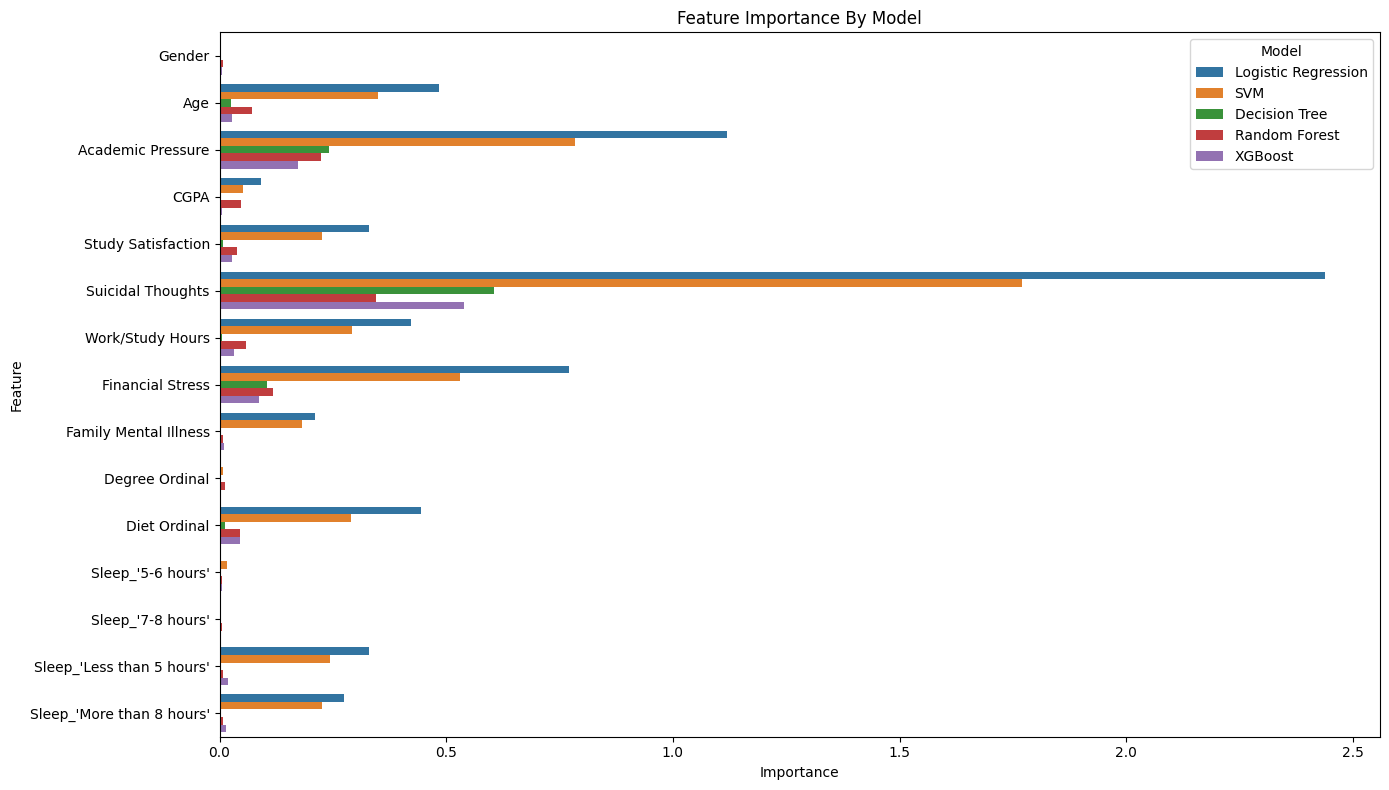

In [294]:
# Plotting the feature importance by model for predicting Depression
features = X_train_raw.columns

feature_importances = {}

# Logistic Regression
feature_importances['Logistic Regression'] = np.abs(lr_best.coef_[0])

# SVM
feature_importances['SVM'] = np.abs(best_svm.coef_[0])

# Decision Tree
feature_importances['Decision Tree'] = best_dt.feature_importances_

# Random Forest
feature_importances['Random Forest'] = best_rf.feature_importances_

# XGBoost
feature_importances['XGBoost'] = best_xgb.feature_importances_

# Combining all into a DataFrame for plotting
importance_df = pd.DataFrame(feature_importances, index=features)

# Melting
importance_melted = importance_df.reset_index().melt(id_vars='index')
importance_melted.columns = ['Feature', 'Model', 'Importance']

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=importance_melted, x='Importance', y='Feature', hue='Model')
plt.title('Feature Importance By Model')
plt.tight_layout()
plt.show()

Suicidal Thoughts is by far the most important feature across all models that support it, which makes a lot of sense clinically since it's a strong predictor of depression.

Academic Pressure and to some degree Work/Study Hours also show up frequently, especially for Logistic Regression, SVM, and Random Forest.

Study Satisfaction, Financial Stress, and Family Mental Illness are moderately important, but not universally across models.

Sleep patterns show minimal importance overall across models, but as suspected the more than 8 hours and elss than 5 hours show relevancy in SVM and Logistic Regression, which care more about individual feature impact.

Gender - still to my surprise - appears to be irrelevant.

# Optional: Hypothesis Testing

## Hypothesis 1

Gender (Female) will be a significant predictor of Depression.

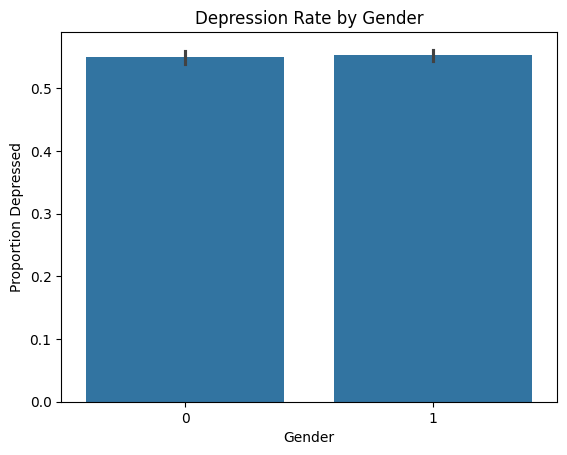

Chi-square test result for Gender and Depression:
Chi2 = 0.155, p-value = 0.6939


In [295]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_gender = pd.crosstab(df['Gender'], df['Depression'])

# Performing Chi-Square Test of Independence (2 categorical variables)
chi2, p, dof, expected = chi2_contingency(contingency_gender)

# Depression by Gender
sns.barplot(x='Gender', y='Depression', data=df)
plt.title('Depression Rate by Gender')
plt.ylabel('Proportion Depressed')
plt.show()

print("Chi-square test result for Gender and Depression:")
print(f"Chi2 = {chi2:.3f}, p-value = {p:.4f}")

My hypothesis was that gender (female) is a predictor for depression. However, the p-value of 0.69 suggests that there is no statistically significant evidence to support this relationship in the sample. As a result, we fail to reject the null hypothesis, which posits that gender (female) does not predict depression. It’s important to note that these findings are based on the current sample only.

## Hypothesis 2

Having experienced suicidal thoughts will be a significant predictor of Depression.

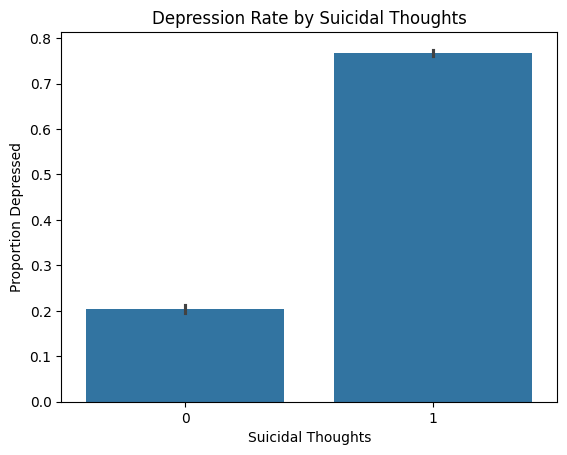

Chi-square test result for Suicidal Thoughts and Depression:
Chi2 = 6579.085, p-value = 0.0000


In [296]:
contingency_suicidal = pd.crosstab(df['Suicidal Thoughts'], df['Depression'])

chi2, p, dof, expected = chi2_contingency(contingency_suicidal)

sns.barplot(x='Suicidal Thoughts', y='Depression', data=df)
plt.title('Depression Rate by Suicidal Thoughts')
plt.ylabel('Proportion Depressed')
plt.show()

print("Chi-square test result for Suicidal Thoughts and Depression:")
print(f"Chi2 = {chi2:.3f}, p-value = {p:.4f}")

The chi-square test result with a  p-value of 0.0000 shows a highly significant association between suicidal thoughts and depression, suggesting a strong relationship between the two variables. This result shows that suicidal thoughts are associated with depression. As a result, we can reject the null hypothesis that Suicidal thoughts do not predict depression.

## Hypothesis 3

Family history of mental illness will predict Depression.

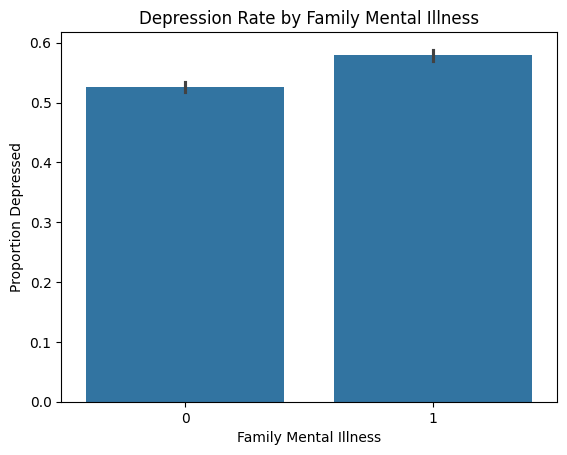

Chi-square test result for Family Mental Illness and Depression:
Chi2 = 61.441, p-value = 0.0000


In [297]:
contingency_family = pd.crosstab(df['Family Mental Illness'], df['Depression'])

chi2, p, dof, expected = chi2_contingency(contingency_family)

sns.barplot(x='Family Mental Illness', y='Depression', data=df)
plt.title('Depression Rate by Family Mental Illness')
plt.ylabel('Proportion Depressed')
plt.show()

print("Chi-square test result for Family Mental Illness and Depression:")
print(f"Chi2 = {chi2:.3f}, p-value = {p:.4f}")

Although the difference in the bar graph appears small, even subtle differences can be statistically significant, especially with a large sample size. In this case, the chi-square test yielded a p-value of 0.0000, indicating a highly significant association between having a family history of mental illness and experiencing depression. Therefore, we reject the null hypothesis that there is no association between family mental illness and depression, and accept the alternative hypothesis that such a relationship exists.

# Conclusion

This project aimed to predict depression among university students using various machine learning models. After preprocessing and feature engineering, six classifiers were trained and evaluated.

Among these, Logistic Regression, SVM, and XGBoost emerged as the top performers, with AUC scores of 0.928. While SVM demonstrated slightly fewer false negatives (an important factor in mental health screening), XGBoost offered a competitive balance of performance and efficiency, making it the most practical model in terms of both accuracy and scalability.

Notably, suicidal thoughts, academic pressure, and work/study hours consistently ranked among the most influential features, highlighting key areas for student support interventions.

Overall, these models do a good job in predicting Depression in students and could be used to identify individuals at-risk for an early intervention.